# Validation of Champ_front_fonc_t keyword

In [1]:
from trustutils import run

run.introduction("N. DJATI")

## Introduction 
 Validation made by : N. DJATI



 Report generated 27/01/2022

### Description

**Champ_front_fonc_t** is a keyword allowing to set time-dependent boundary conditions for vector and scalar quantities such as velocity, temperature, flow rate,... , etc.

The current validation form aims to validate its implementation in VEF and VDF in 2D and 3D config-urations.

In [2]:
run.TRUST_parameters("1.7.7")

### TRUST parameters 
 * Version TRUST: 1.7.7
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/Verification_codage/Time_dependent_velocity/build)

In [3]:
from trustutils import run
run.reset()
c1 = run.addCase("test1_VDF"    ,"test.data",nbProcs=1)  
c3 = run.addCase("test1_VEF"    ,"test.data",nbProcs=1)   
c2 = run.addCase("test2_VDF"    ,"test.data",nbProcs=1)   
c4 = run.addCase("test2_VEF"    ,"test.data",nbProcs=1)   
c5 = run.addCase("test_3D_VDF"  ,"test_3D.data",nbProcs=1)  
c6 = run.addCase("test_3D_VEF"  ,"test_3D.data",nbProcs=1)
run.printCases()
run.runCases()

### Test cases 
* test1_VDF/test.data : 
* test1_VEF/test.data : 
* test2_VDF/test.data : 
* test2_VEF/test.data : 
* test_3D_VDF/test_3D.data : 
* test_3D_VEF/test_3D.data : 


Running **with Sserver**...
  => A total of 6 cases were (successfully) run in 1.1s.


## Check if champ_front_debit accepts champ_front_fonc_txyz

The development of **Champ_front_fonc_t**  first motivated by blocking the usage of **champ_front_fonc_t**  with **champ_front_fonc_t**. In the following, we check on a simple test case that the usage of **Champ_front_fonc_t**  is NOT ALLOWED with **Champ_front_fonc_t** . Inlet boundary condition in Champfrontdebit.data datafile:

In [4]:
run.dumpData("./test1_VDF/my_text")

 	 	 	 inlet frontiere_ouverte_vitesse_imposee champ_front_debit champ_front_fonc_txyz 2 2.*t+x+1. y
 $ tail -5 NotWorking/Champ_front_debit.err:
 The number of components readed for this field 4 is not compatible with its nature.
 It should read 2 components for this field.
 TRUST has caused an error and will stop.
 Unexpected error during TRUST calculation.
 __________________________________________________________________________________
 => This is the seeked behaviour of TRUST when 'champ_front_fonc_txyz' is used with 'champ_front_debit'.
 __________________________________________________________________________________



## Test cases description

In the current validation form, we consider the flow inside a (2D and 3D) plane channel.  We set a time dependent velocity at the inlet of the channel.  In addition, we impose symmetry boundary conditions on lateral walls in order to not alterate the velocity profile near walls and a null outlet pressure.  Furthermore, we neglect convection.


We distinguish three different configurations.  The first one concerns an imposed velocity following the x-direction  (i.e.: $u_x=f(t)$  and $u_y=  0$  )  while  in  the  second  one  we  impose  an  inlet  velocity  in  they-direction (i.e.: $u_x= 0$ and $u_y=f(t)$ ) in 2D. In the last one, we impose a time dependend inlet velocity in the z-direction (i.e.: $u_x= 0$, $u_y= 0$ and $u_z=f(t)$ ) in 3D.


For  all  cases,  we  access  to  the  average  inlet  velocity  from  TRUST  by  means  of  keywords **Definition Champs** and **Reduction_0D**.

### Testcase 1: $\vec{u}= (2t+1,0)^t$

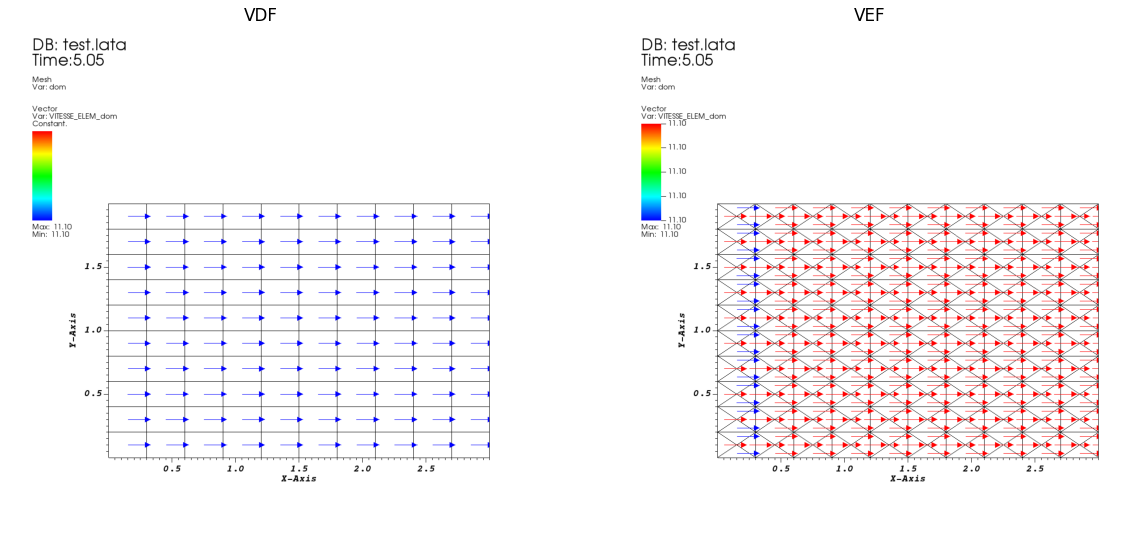

In [5]:
from trustutils import visit

a = visit.Show("./test1_VDF/test.lata", "Vector", "VITESSE_ELEM_dom",nY=2,title="VDF")
a.add("./test1_VEF/test.lata", "Vector", "VITESSE_ELEM_dom",yIndice=1,title="VEF")
a.plot()

### Testcase 2:  $\vec{u}=(0,2 t^2+0.1)^t$

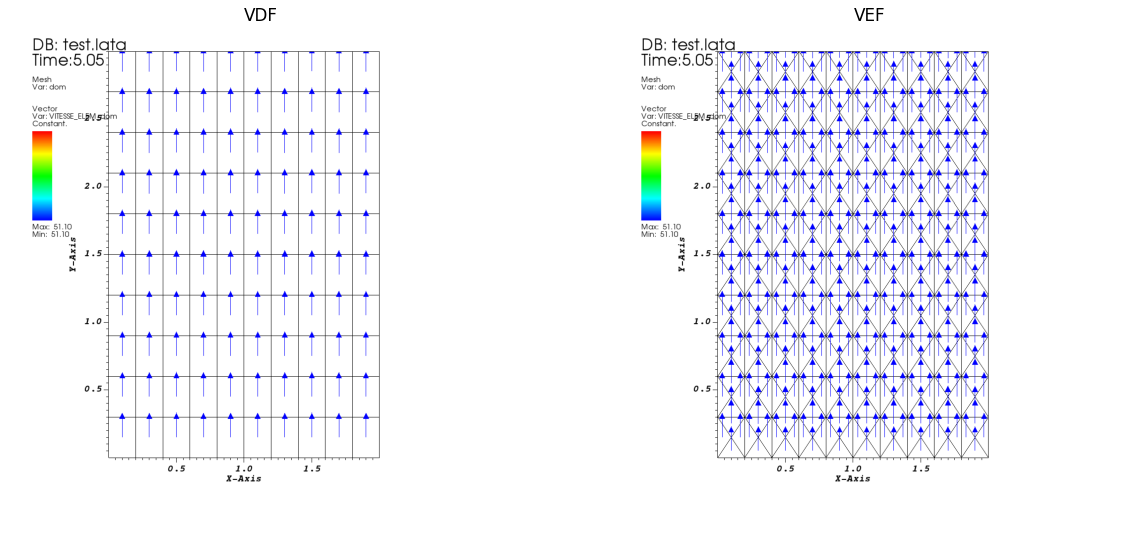

In [6]:
from trustutils import visit

a = visit.Show("./test2_VDF/test.lata", "Vector", "VITESSE_ELEM_dom",nY=2,title="VDF")
a.add("./test2_VEF/test.lata", "Vector", "VITESSE_ELEM_dom",yIndice=1,title="VEF")
a.plot()

### Testcase 3:  $\vec{u}=(0,0,t/2+0.1)^t$

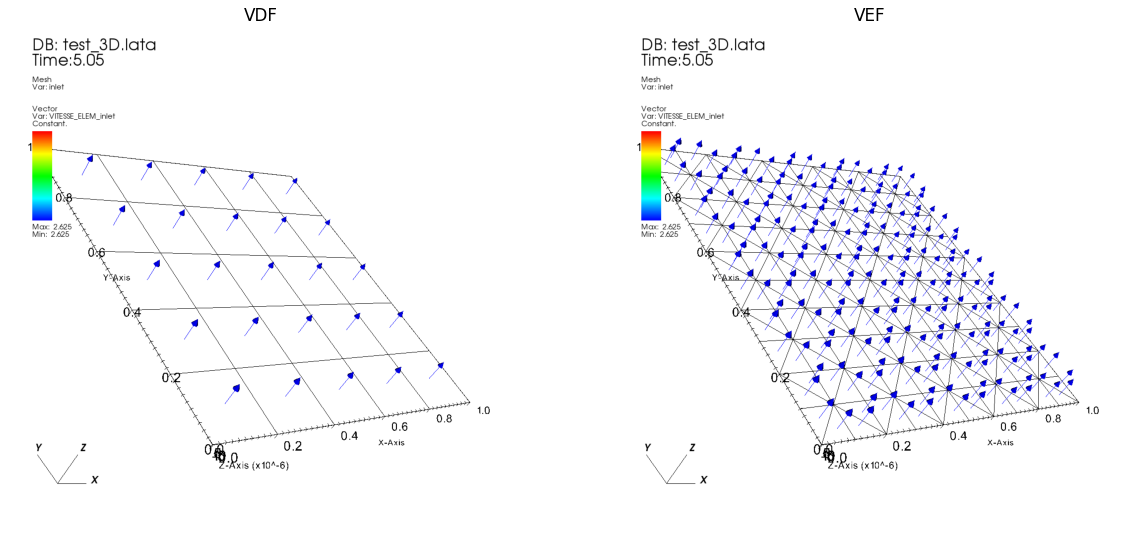

In [7]:
from trustutils import visit

a = visit.Show("./test_3D_VDF/test_3D.lata", "Vector", "VITESSE_ELEM_inlet",nY=2,mesh='inlet',title="VDF")
a.rotation3D([-45,45,0])
a.add("./test_3D_VEF/test_3D.lata", "Vector", "VITESSE_ELEM_inlet",yIndice=1,mesh="inlet",title="VEF")  
a.rotation3D([-45,45,0])
a.plot()

## Time evolution of inlet velocity

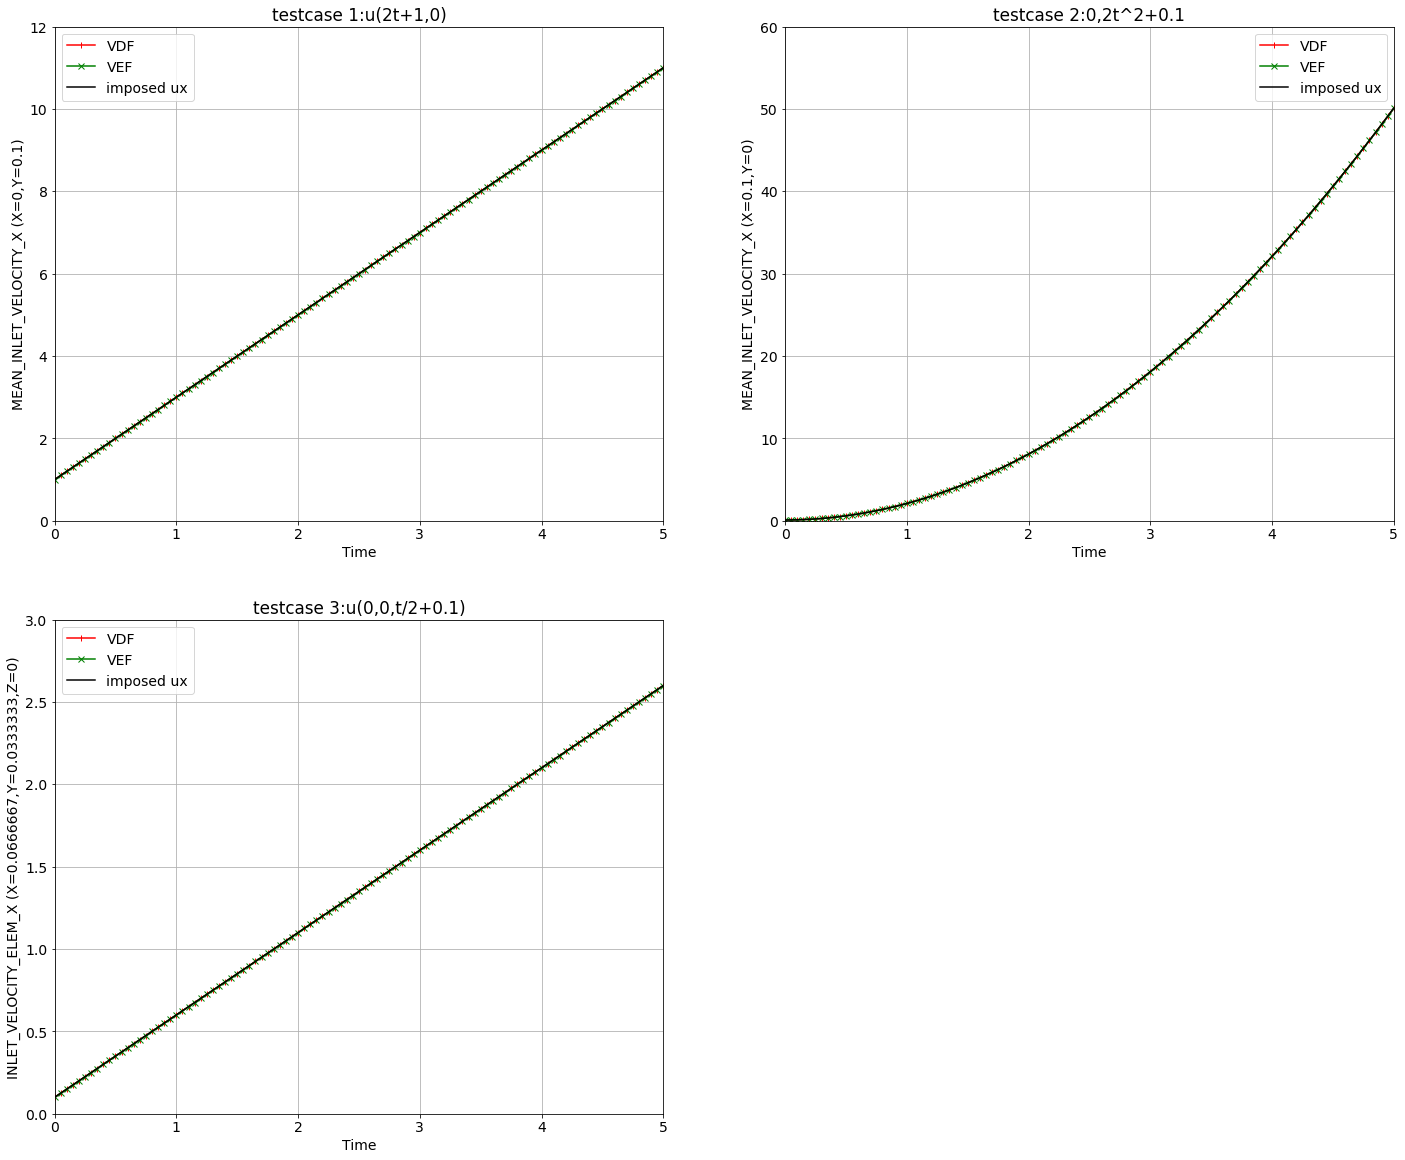

In [10]:
from trustutils import plot
import numpy as np

x=np.linspace(0,5,100)

graphique=plot.Graph("testcase 1:u(2t+1,0)",nX=2,nY=2) 
graphique.addPoint('./test1_VDF/test_VITESSE_U.son',marker="-|" ,color='r',var="x" ,label="VDF")  
graphique.addPoint('./test1_VEF/test_VITESSE_U.son',marker="-x" ,color='g',var="x" ,label="VEF")  
graphique.add(x,2*x+1,color="k",label="imposed ux")
graphique.visu(0,5,0,12)

graphique.addPlot([0,1],"testcase 2:0,2t^2+0.1")
graphique.addPoint('./test2_VDF/test_VITESSE_U.son',marker="-|"   ,color='r'     ,var="y" ,label="VDF") 
graphique.addPoint('./test2_VEF/test_VITESSE_U.son',marker="-x"   ,color='g'     ,var="y" ,label="VEF")  
graphique.add(x,2*x**2+0.1,color="k",label="imposed ux")
graphique.visu(0,5,0,60)

graphique.addPlot([1,0],"testcase 3:u(0,0,t/2+0.1)") 
graphique.addPoint('./test_3D_VEF/test_3D_VITESSE_U.son',marker="-|" , color='r'     ,var="z" ,label="VDF")  
graphique.addPoint('./test_3D_VEF/test_3D_VITESSE_U.son',marker="-x" , color='g'     ,var="z" ,label="VEF")  
graphique.add(x, x/2+0.1,color="k",label="imposed ux")
graphique.visu(0,5,0,3)

## Maximum error on inlet velocity

At a given time $t_i$, the relative error on the inlet velocity is computed by:

\begin{equation}
err(t_i) = \frac{|u_{\text{inlet}}^{\text{imposed}}(t_i)-\bar{u}_{\text{inlet}}^{\text{TRUST}}(t_i)|}{u_{\text{inlet}}^{\text{imposed}}(t_i)}
\end{equation}

$u_{\text{inlet}}^{\text{imposed}}(t_i) = f(t_i)$ and $\bar{u}_{\text{inlet}}^{\text{TRUST}}(t_i)$ is the averaged velocity on cells located at the inlet (inlet edge in 2D or inlet surface in 3D). \
The table below highlights that the maximum error (for which the time evolution is plotted in the previous subsection) is too small and is close to machine error.

In [50]:
columns=[" Total number of time steps","t max","max err"]
Table=plot.Table(columns)  

data = plot.loadText("./test1_VDF/max.txt")
Table.addLigne([data],"2D VDF testcase 1")
data = plot.loadText("./test1_VEF/max.txt")
Table.addLigne([data],"2D VEF testcase 1")

data = plot.loadText("./test2_VDF/max.txt")
Table.addLigne([data],"2D VDF testcase 2")
data = plot.loadText("./test2_VEF/max.txt")
Table.addLigne([data],"2D VEF testcase 2")

data = plot.loadText("./test_3D_VDF/max.txt")
Table.addLigne([data],"3D VDF testcase 3")
data = plot.loadText("./test_3D_VEF/max.txt")
Table.addLigne([data],"3D VEF testcase 3")

Table.df

,Total number of time steps,t max,max err
2D VDF testcase 1,101.0,5.05,0.000000e+00
2D VEF testcase 1,101.0,5.05,0.000000e+00
2D VDF testcase 2,101.0,5.05,3.500000e-16
2D VEF testcase 2,101.0,5.05,3.500000e-16
3D VDF testcase 3,101.0,5.05,2.200000e-16
3D VEF testcase 3,101.0,5.05,2.200000e-16
